<a href="https://colab.research.google.com/github/Fernandadeltoro/BreakThroughTechProduct/blob/main/GWC_PetFinder_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 GWC Intro to ML — PetFinder Adoption Speed

Welcome! In this hands-on mini-workshop you'll build your **first ML model** to predict a pet's adoption speed using the [PetFinder Adoption Prediction](https://www.kaggle.com/competitions/petfinder-adoption-prediction) dataset.

**Goals:**
1. Load the data in pandas
2. Explore it (EDA) and build simple features
3. Train 2 quick baseline models

**You will learn:** pandas basics, feature engineering, train/test split, model training, and model evaluation.

## 0) Setup

Kaggle API:
1. Upload your `kaggle.json` (Account > Create New API Token)
2. Run the Kaggle cell to download files automatically.

In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json from your computer

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the PetFinder Adoption Prediction dataset
!kaggle competitions download -c petfinder-adoption-prediction

# Unzip the dataset
!unzip petfinder-adoption-prediction.zip -d petfinder_data

# Load the training data
import pandas as pd
data = pd.read_csv("petfinder_data/train/train.csv")
data.head()


Streaming output truncated to the last 5000 lines.
  inflating: petfinder_data/train_sentiment/a89bfa0aa.json  
  inflating: petfinder_data/train_sentiment/a89d4e8f3.json  
  inflating: petfinder_data/train_sentiment/a89f8b241.json  
  inflating: petfinder_data/train_sentiment/a89fd1f1e.json  
  inflating: petfinder_data/train_sentiment/a8a1d4151.json  
  inflating: petfinder_data/train_sentiment/a8a2aecc3.json  
  inflating: petfinder_data/train_sentiment/a8a3c4f49.json  
  inflating: petfinder_data/train_sentiment/a8a8f95f6.json  
  inflating: petfinder_data/train_sentiment/a8b358af2.json  
  inflating: petfinder_data/train_sentiment/a8b9d57b4.json  
  inflating: petfinder_data/train_sentiment/a8ba4dfa1.json  
  inflating: petfinder_data/train_sentiment/a8c19a325.json  
  inflating: petfinder_data/train_sentiment/a8c336257.json  
  inflating: petfinder_data/train_sentiment/a8c555240.json  
  inflating: petfinder_data/train_sentiment/a8cdba660.json  
  inflating: petfinder_data/train_

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


## 1) Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


3) Quick EDA
- Peek at numeric columns
- Check target distribution (`AdoptionSpeed`: 0=fastest … 4=slowest)
- Look at features that intuitively matter (e.g., `PhotoAmt`, `VideoAmt`, `Description`)

Dataset shape: (14993, 24)

Columns:
 ['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed']

Summary statistics:
                Type           Age      PhotoAmt  AdoptionSpeed
count  14993.000000  14993.000000  14993.000000   14993.000000
mean       1.457614     10.452078      3.889215       2.516441
std        0.498217     18.155790      3.487810       1.177265
min        1.000000      0.000000      0.000000       0.000000
25%        1.000000      2.000000      2.000000       2.000000
50%        1.000000      3.000000      3.000000       2.000000
75%        2.000000     12.000000      5.000000       4.000000
max        2.000000    255.000000     30.000000       4.000000


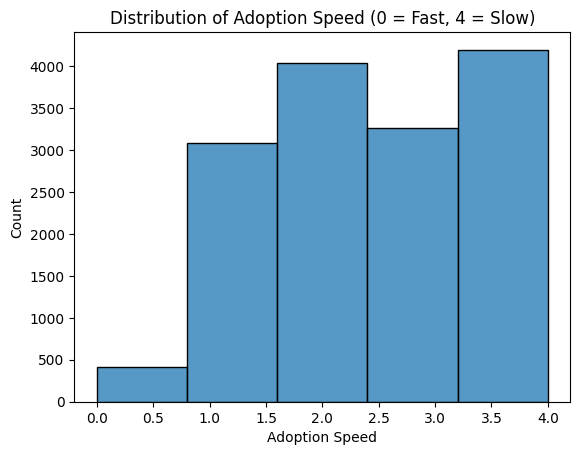

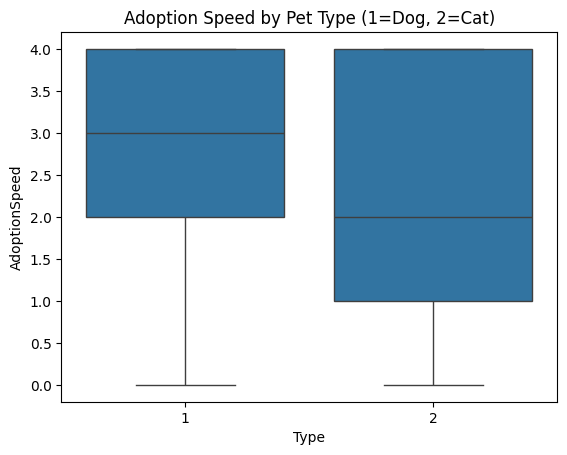

In [ ]:
print("Dataset shape:", data.shape)
print("\nColumns:\n", data.columns.tolist())
print("\nSummary statistics:\n", data[["Type", "Age", "PhotoAmt", "AdoptionSpeed"]].describe())

sns.histplot(data["AdoptionSpeed"], bins=5, kde=False)
plt.title("Distribution of Adoption Speed (0 = Fast, 4 = Slow)")
plt.xlabel("Adoption Speed")
plt.ylabel("Count")
plt.show()

sns.boxplot(x="Type", y="AdoptionSpeed", data=data)
plt.title("Adoption Speed by Pet Type (1=Dog, 2=Cat)")
plt.show()

## 4) Simple feature engineering
- `DescLen`: characters in description
- `WordCount`: words in description
- `HasName`: boolean if pet has a name
- `HasVideo`: boolean if videos are available
- `IsPureBreed`: 1 if `Breed2 == 0` else 0
- Use provided numeric columns: `Age`, `Fee`, `PhotoAmt`, `VideoAmt`, `Quantity`
- A few categorical columns: `Type`, `Gender`, `Vaccinated`, `Dewormed`, `Sterilized`, `Health`, `MaturitySize`, `FurLength`

In [ ]:
# Select a small useful subset of features
df = data[["Type", "Age", "PhotoAmt", "AdoptionSpeed"]].dropna()

# Train/test split
X = df[["Type", "Age", "PhotoAmt"]]
y = df["AdoptionSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 11994
Testing samples: 2999


## 5) Baseline model (Linear Regression on ordinal target)
This treats the target as numeric (0–4). It's **not perfect** for ordinal labels but great for a first pass.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("\nLinear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.016192466546224416
Linear Regression RMSE: 1.1768277074771751


# 6) Decision Tree Model + Visualization 🌳

In [ ]:
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nDecision Tree R²:", r2_score(y_test, y_pred_tree))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

## 7) Visualization


In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_tree, label="Decision Tree", alpha=0.7)
plt.xlabel("Actual Adoption Speed")
plt.ylabel("Predicted Adoption Speed")
plt.legend()
plt.title("Model Prediction Comparison: Linear vs Tree")
plt.show()

---
🎉 **You did it!** You trained your first ML models with PetFinder data.

Try at home:
- Swap LinearRegression → **Ordinal regression** or tree models
- Add NLP features (sentiment, TF‑IDF on descriptions)
- Use image features (photo quality/embeddings) for advanced sessions